Nama : Adinda Putri Rachmawati

NPM : 24083010005

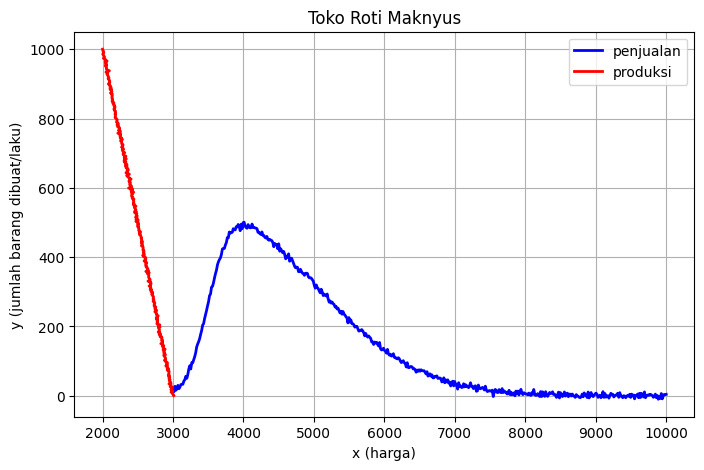

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm
from scipy.interpolate import interp1d # Import interp1d

# range harga jual
x = np.linspace(3000, 10000, 500)

# rescale parameters
a = 6
loc = 3.5 * 1000     # shift loc
scale = 1.5 * 1000   # widen scale

# probability density, right tail skew
y = skewnorm.pdf(x, a=a, loc=loc, scale=scale) * 1000

np.random.seed(5) # masukkan NPM
y = y + np.random.normal(0, 0.005, size=x.shape)  # add Gaussian noise
y = y*1000

# harga produksi
produksi_y= np.linspace(0, 1000, len(x))
produksi_z = np.linspace(3000, 2000, len(x)) + np.random.normal(0, 0.1, size=x.shape)*100
# linearly decreases from 3000 -> 2000 for quantity 0 -> 1000


# Plot
plt.figure(figsize=(8,5))
plt.plot(x, y, color="blue", label='penjualan', linewidth=2)
plt.plot(produksi_z, produksi_y, color="red", label='produksi', linewidth=2)
plt.title("Toko Roti Maknyus")
plt.xlabel("x (harga)")
plt.ylabel("y (jumlah barang dibuat/laku)")
plt.grid(True)
plt.legend()
plt.show()

# Penjelasan


- x (harga) = harga roti (Rp)

- y (jumlah barang dibuat/laku) = jumlah roti yang diproduksi atau terjual

**Di dalam grafik ada 2 kurva:**

1. Kurva biru (penjualan) → menunjukkan hubungan antara harga roti dengan jumlah roti yang laku.

- Saat harga rendah (sekitar Rp 2.000–3.000), permintaan sangat tinggi (mendekati 1000 roti).

- Semakin naik harga, permintaan menurun drastis.

- Ada sedikit fluktuasi di tengah (sekitar Rp 3.500–5.000), mungkin karena faktor promosi atau preferensi pembeli.

- Pada harga tinggi (Rp 8.000 ke atas), jumlah roti yang laku hampir nol.



2. Kurva merah (produksi) → menunjukkan kapasitas produksi atau jumlah roti yang disediakan.

- Produksi dimulai tinggi (sekitar 1000 roti di harga rendah), lalu menurun seiring kenaikan harga.

- Artinya, semakin tinggi harga jual, produsen cenderung tidak memproduksi terlalu banyak karena permintaan menurun.

**Hubungan antar kurva**

- Daerah perpotongan antara kurva produksi (merah) dan penjualan (biru) → bisa dianggap sebagai titik keseimbangan.
Pada titik ini, jumlah roti yang diproduksi ≈ jumlah roti yang dibeli konsumen.

- Jika produksi > penjualan, maka ada sisa stok (potensi rugi karena tidak laku).

- Jika produksi < penjualan, maka ada kekurangan stok (potensi rugi karena kehilangan kesempatan jual).

Harga optimal: 6.409 ribu
Volume produksi optimal: 72.87 unit
Pendapatan optimal: 467.02 ribu rupiah
Biaya optimal: 171.91 ribu rupiah
Laba maksimum: 295.11 ribu rupiah


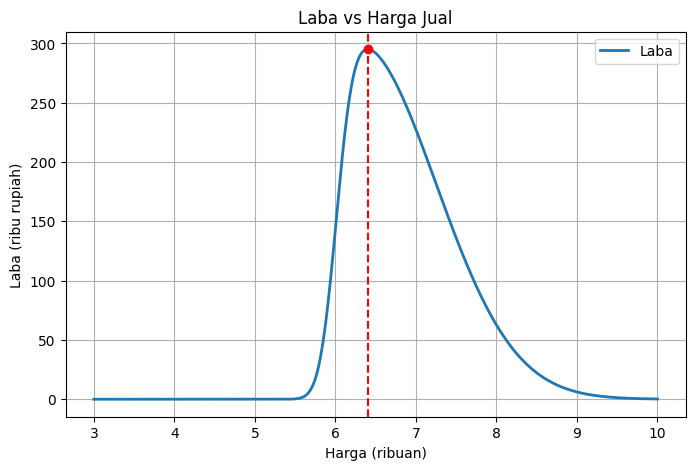

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

#Domain harga (ribuan rupiah)
x = np.linspace(3, 10, 500)

#Distribusi penjualan (jumlah barang)
q = skewnorm.pdf(x, a=6, loc=6, scale=1.0) * 100   #jumlah unit terjual

#Biaya produksi per unit (fungsi harga jual, sesuai model awal)
c = -0.1 * x + 3

#Perhitungan pendapatan, biaya total, dan laba
pendapatan = x * q
biaya_total = q * c
laba = pendapatan - biaya_total

#Cari titik maksimum laba
idx_opt = np.argmax(laba)
x_opt = x[idx_opt]
q_opt = q[idx_opt]
pendapatan_opt = pendapatan[idx_opt]
biaya_opt = biaya_total[idx_opt]
laba_opt = laba[idx_opt]

#Cetak hasil
print(f"Harga optimal: {x_opt:.3f} ribu")
print(f"Volume produksi optimal: {q_opt:.2f} unit")
print(f"Pendapatan optimal: {pendapatan_opt:.2f} ribu rupiah")
print(f"Biaya optimal: {biaya_opt:.2f} ribu rupiah")
print(f"Laba maksimum: {laba_opt:.2f} ribu rupiah")

#Visualisasi
plt.figure(figsize=(8,5))
plt.plot(x, laba, label="Laba", linewidth=2)
plt.axvline(x_opt, color="red", linestyle="--")
plt.scatter([x_opt], [laba_opt], color="red", zorder=5)
plt.title("Laba vs Harga Jual")
plt.xlabel("Harga (ribuan)")
plt.ylabel("Laba (ribu rupiah)")
plt.legend()
plt.grid(True)
plt.show()
